In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering, FeatureAgglomeration, KMeans, DBSCAN
import scipy.cluster.hierarchy as sch
import sys, pickle
from classDeclarations import file_data
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction import DictVectorizer
from scipy.sparse import vstack, csr_matrix
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [2]:
with open('gathered_data_byte_vector/sample1/byte_vectors_v1_512B.pkl', "rb") as fp:
    dataset = pickle.load(fp)
print(len(dataset))

6


In [3]:
all_file_data = dataset[0] + dataset[1] + dataset[2] + dataset[3] + dataset[4] + dataset[5]
#Input Y: 2-d numpy array with features reduced
#Original file_data to get extractors from
#plot title
def plot_extractors_against_feature_reduction(all_file_data, Y, title):
    no_best_extractor = True
    image_best_extractor = True
    tab_best_extractor = True
    kw_best_extractor = True

    json_xml_best_extractor = True
    netcdf_best_extractor = True


    for i in range(Y.shape[0]):

        if all_file_data[i].best_extractors == 'unknown':
            plt.plot(Y[i][0], Y[i][1], "rx", label="No extractor/unknown" if no_best_extractor else "")
            no_best_extractor = False
        elif all_file_data[i].best_extractors == 'image':
            plt.plot(Y[i][0], Y[i][1], "ro", label="Image best extractor" if image_best_extractor else "")
            image_best_extractor = False
        elif all_file_data[i].best_extractors == 'tabular':
            plt.plot(Y[i][0], Y[i][1], "bo", label="Tabular best extractor" if tab_best_extractor else "")
            tab_best_extractor = False
        elif all_file_data[i].best_extractors == 'freetext':
            plt.plot(Y[i][0], Y[i][1], "go", label="Keyword best extractor" if kw_best_extractor else "")
            kw_best_extractor = False
        elif all_file_data[i].best_extractors == 'json/xml':
            plt.plot(Y[i][0], Y[i][1], "co", label="JSON/XML best extractor" if json_xml_best_extractor else "")
            json_xml_best_extractor = False
        elif all_file_data[i].best_extractors == 'netcdf':
            plt.plot(Y[i][0], Y[i][1], "mo", label="netcdf best extractor" if netcdf_best_extractor else "")
            netcdf_best_extractor = False
    
          
    plt.legend()
    plt.title(title)
    plt.show()

def plot_extractors_against_feature_reduction_3d(all_file_data, Y, title):
    no_best_extractor = True
    image_best_extractor = True
    tab_best_extractor = True
    kw_best_extractor = True

    json_xml_best_extractor = True
    netcdf_best_extractor = True

    
    fig = plt.figure()
    ax = Axes3D(fig)

    for i in range(Y.shape[0]):

        if all_file_data[i].best_extractors == 'unknown':
            ax.plot(Y[i][0], Y[i][1], Y[i][2], "rx", label="No extractor/unknown" if no_best_extractor else "")
            no_best_extractor = False
        elif all_file_data[i].best_extractors == 'image':
            ax.plot(Y[i][0], Y[i][1], Y[i][2], "ro", label="Image best extractor" if image_best_extractor else "")
            image_best_extractor = False
        elif all_file_data[i].best_extractors == 'tabular':
            ax.plot(Y[i][0], Y[i][1], Y[i][2], "bo", label="Tabular best extractor" if tab_best_extractor else "")
            tab_best_extractor = False
        elif all_file_data[i].best_extractors == 'freetext':
            ax.plot(Y[i][0], Y[i][1], Y[i][2], "go", label="Keyword best extractor" if kw_best_extractor else "")
            kw_best_extractor = False
        elif all_file_data[i].best_extractors == 'json/xml':
            ax.plot(Y[i][0], Y[i][1], Y[i][2], "co", label="JSON/XML best extractor" if json_xml_best_extractor else "")
            json_xml_best_extractor = False
        elif all_file_data[i].best_extractors == 'netcdf':
            ax.plot(Y[i][0], Y[i][1], Y[i][2], "mo", label="netcdf best extractor" if netcdf_best_extractor else "")
            netcdf_best_extractor = False
    
          
    plt.legend()
    plt.title(title)
    plt.show()

# Just stacks the file data together for ONE FILE TYPE 
def combine_1gram_data(file_data):
    one_gram_array = np.empty((0, 0))
   
    for data in file_data:
        if one_gram_array.size == 0:
            one_gram_array = data.one_gram_distr
        else:
            one_gram_array = np.vstack((one_gram_array, data.one_gram_distr))
    return one_gram_array

In [4]:
one_gram_img = combine_1gram_data(dataset[0])
one_gram_tabular = combine_1gram_data(dataset[1])
one_gram_freetext = combine_1gram_data(dataset[2])
one_gram_json_xml = combine_1gram_data(dataset[3])
one_gram_netcdf = combine_1gram_data(dataset[4])
one_gram_unknown = combine_1gram_data(dataset[5])

print(one_gram_img.shape)
print(one_gram_tabular.shape)
print(one_gram_freetext.shape)
print(one_gram_json_xml.shape)
print(one_gram_netcdf.shape)
print(one_gram_unknown.shape)

total_dataset_1_gram = np.vstack((one_gram_img, one_gram_tabular, one_gram_freetext, one_gram_json_xml, one_gram_netcdf, one_gram_unknown))
print(total_dataset_1_gram.shape)
print(type(total_dataset_1_gram))
total_dataset_1_gram = np.nan_to_num(total_dataset_1_gram)

(100, 514)
(100, 514)
(100, 514)
(100, 514)
(100, 514)
(100, 514)
(600, 514)
<class 'numpy.ndarray'>


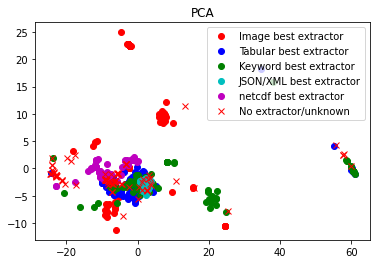

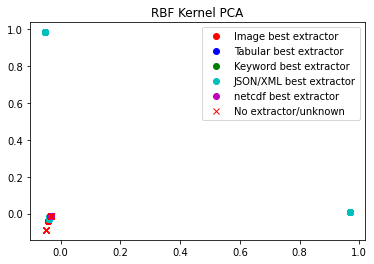

In [40]:
sc_pca = StandardScaler()
pca_onegram = PCA(n_components=2)


pca_after_scale = Pipeline([('sc', sc_pca),
                            ('pca', pca_onegram)])

onegram_pca = pca_after_scale.fit_transform(total_dataset_1_gram)



sc_kpca = StandardScaler()
kpca = KernelPCA(n_components=2, kernel='rbf', 
                 gamma=15, random_state=42)

kpca_after_scale = Pipeline([('sc', sc_kpca),
                            ('pca', kpca)])

onegram_kpca = kpca_after_scale.fit_transform(total_dataset_1_gram)

plot_extractors_against_feature_reduction(all_file_data, onegram_pca, "PCA")
plot_extractors_against_feature_reduction(all_file_data, onegram_kpca, "RBF Kernel PCA")

In [6]:
pca = PCA(n_components=3)
onegram_pca = pca.fit_transform(total_dataset_1_gram)

kpca = KernelPCA(n_components=3, kernel='rbf', 
                 gamma=15, random_state=42)
onegram_kpca = kpca.fit_transform(total_dataset_1_gram)

/tmp/ipykernel_2239352/2899937.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


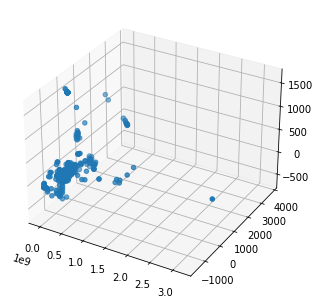

In [7]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(onegram_pca[:,0], onegram_pca[:,1], onegram_pca[:,2])
plt.show()


/tmp/ipykernel_2239352/2744456329.py:52: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


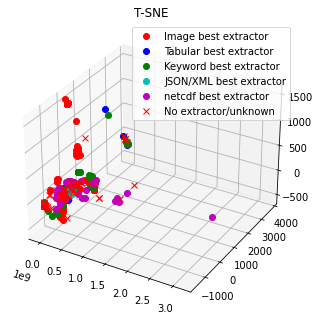

In [8]:
plot_extractors_against_feature_reduction_3d(all_file_data, onegram_pca, "T-SNE")


/tmp/ipykernel_2239352/3928450748.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


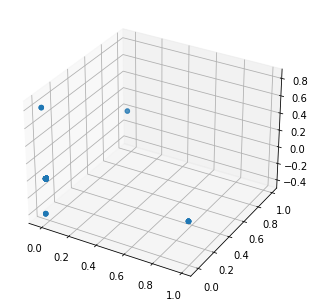

In [9]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(onegram_kpca[:,0], onegram_kpca[:,1], onegram_kpca[:,2])
plt.show()

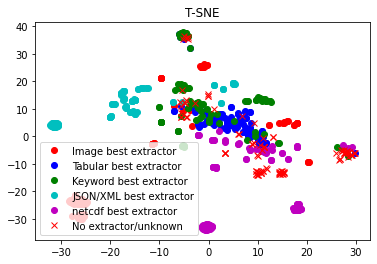

In [10]:
sc = StandardScaler()
pca = PCA(n_components=50)
tsne = TSNE(n_components=2)

tsne_after_pca = Pipeline([
    ('std_scaler', sc),
    ('pca', pca),
    ('tsne', tsne)
])

onegram_tsne = tsne_after_pca.fit_transform(total_dataset_1_gram)
plot_extractors_against_feature_reduction(all_file_data, onegram_tsne, "T-SNE")

/tmp/ipykernel_2239352/2561513177.py:13: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


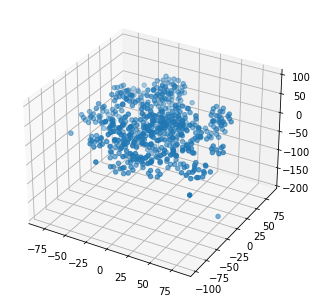

In [11]:
sc = StandardScaler()
pca = PCA(n_components=50)
tsne = TSNE(n_components=3)

tsne_after_pca = Pipeline([
    ('std_scaler', sc),
    ('pca', pca),
    ('tsne', tsne)
])

onegram_tsne = tsne_after_pca.fit_transform(total_dataset_1_gram)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(onegram_tsne[:,0], onegram_tsne[:,1], onegram_tsne[:,2])
plt.show()


/tmp/ipykernel_2239352/2744456329.py:52: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


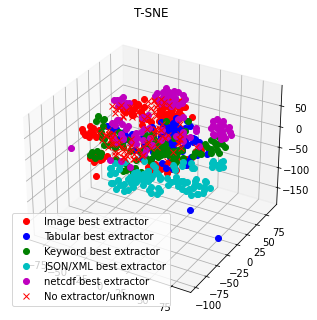

In [12]:
plot_extractors_against_feature_reduction_3d(all_file_data, onegram_tsne, "T-SNE")


[[-26.322657   54.43578    24.375076 ]
 [ 35.56548    20.860048   -2.6261623]
 [ 13.304427  -19.9081    -56.567413 ]
 [  3.967862  -56.834515   20.913662 ]
 [-41.83331     6.8696117 -28.257658 ]
 [  2.0643923  -9.18517    53.63135  ]]


/tmp/ipykernel_2239352/2734422362.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


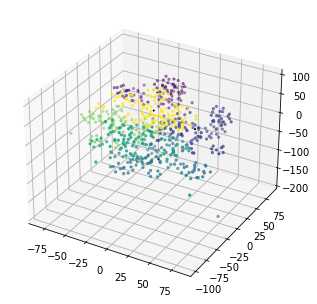

In [13]:
fig = plt.figure()
ax = Axes3D(fig)

kmeans = KMeans(n_clusters=6)
data_pred = kmeans.fit_predict(onegram_tsne)
ax.scatter(onegram_tsne[:, 0], onegram_tsne[:,1], onegram_tsne[:,2], c=data_pred, s=5, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:,2], c='black', s=1, alpha=1)
print(centers)
plt.show()

# 2 grams

In [14]:
def combine_2gram_data(file_data):
    two_gram_array = np.empty((0, 0))
   
    for data in file_data:
        if two_gram_array.size == 0:
            two_gram_array = data.two_gram_distr
        else:
            two_gram_array = np.vstack((two_gram_array, data.two_gram_distr))
    return two_gram_array

In [15]:
two_gram_img = combine_2gram_data(dataset[0])
two_gram_tabular = combine_2gram_data(dataset[1])
two_gram_freetext = combine_2gram_data(dataset[2])
two_gram_json_xml = combine_2gram_data(dataset[3])
two_gram_netcdf = combine_2gram_data(dataset[4])
two_gram_unknown = combine_2gram_data(dataset[5])

two_grams_total_dataset = np.vstack((two_gram_img, two_gram_tabular, two_gram_freetext, two_gram_json_xml, two_gram_netcdf, two_gram_unknown))
print(two_grams_total_dataset.shape)
two_grams_total_dataset = np.nan_to_num(two_grams_total_dataset)

(600, 513)


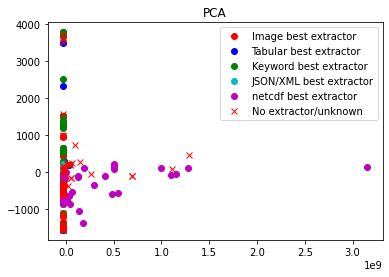

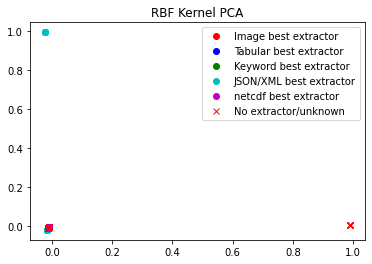

In [16]:
pca = PCA(n_components=2)
twogram_pca = pca.fit_transform(two_grams_total_dataset)

kpca = KernelPCA(n_components=2, kernel='rbf', 
                 gamma=15, random_state=42)
twogram_kpca = kpca.fit_transform(two_grams_total_dataset)

plot_extractors_against_feature_reduction(all_file_data, twogram_pca, "PCA")
plot_extractors_against_feature_reduction(all_file_data, twogram_kpca, "RBF Kernel PCA")

In [17]:
print(pca.explained_variance_ratio_)

[1.00000000e+00 2.41323333e-11]


/tmp/ipykernel_2239352/2744456329.py:52: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


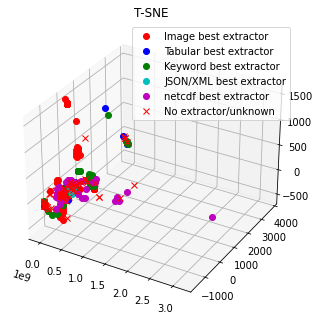

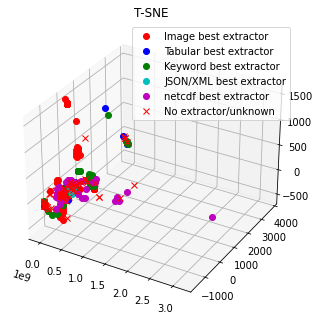

In [18]:
pca = PCA(n_components=3)
twogram_pca = pca.fit_transform(two_grams_total_dataset)

kpca = KernelPCA(n_components=3, kernel='rbf', 
                 gamma=15, random_state=42)
twogram_kpca = kpca.fit_transform(two_grams_total_dataset)

plot_extractors_against_feature_reduction_3d(all_file_data, twogram_pca, "T-SNE")
plot_extractors_against_feature_reduction_3d(all_file_data, twogram_pca, "T-SNE")



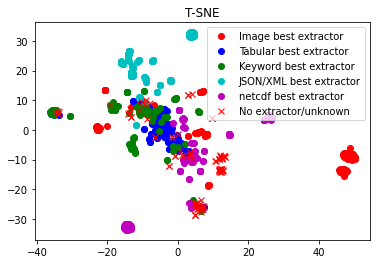

In [19]:
sc = StandardScaler()
pca = PCA(n_components=50)
tsne = TSNE(n_components=2)

tsne_after_pca = Pipeline([
    ('std_scaler', sc),
    ('pca', pca),
    ('tsne', tsne)
])

twogram_tsne = tsne_after_pca.fit_transform(two_grams_total_dataset)
plot_extractors_against_feature_reduction(all_file_data, twogram_tsne, "T-SNE")

/tmp/ipykernel_2239352/1875286996.py:13: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


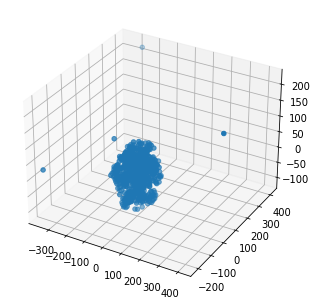

In [20]:
sc = StandardScaler()
pca = PCA(n_components=100)
tsne = TSNE(n_components=3)

tsne_after_pca = Pipeline([
    ('std_scaler', sc),
    ('pca', pca),
    ('tsne', tsne)
])

twogram_tsne = tsne_after_pca.fit_transform(two_grams_total_dataset)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(twogram_tsne[:,0], twogram_tsne[:,1], twogram_tsne[:,2])
plt.show()

In [21]:
print(pca.explained_variance_ratio_)

[0.42890781 0.10653741 0.04186275 0.03528761 0.02487399 0.01775673
 0.01743985 0.01659387 0.01433275 0.01171506 0.01012925 0.00942064
 0.00816239 0.0077515  0.00688082 0.00658378 0.00613995 0.00566808
 0.00537513 0.00526515 0.00475445 0.00455343 0.00451109 0.00390865
 0.00381439 0.00372027 0.00363587 0.00347467 0.00341202 0.00338171
 0.00321834 0.00316888 0.00300423 0.00297444 0.00294105 0.00286673
 0.0027767  0.00271835 0.00266665 0.00259233 0.00252288 0.00250194
 0.00245501 0.00235191 0.00232518 0.00226505 0.00221129 0.00217382
 0.00212552 0.00210313 0.00205118 0.0020293  0.00199911 0.00195866
 0.00189743 0.0018842  0.00181607 0.00177251 0.00175048 0.00170344
 0.00165855 0.00163434 0.00161687 0.00159457 0.00157029 0.00154564
 0.00148817 0.00147209 0.00143249 0.00140485 0.00139315 0.00135309
 0.00133535 0.00130669 0.00129661 0.0012814  0.00126681 0.00124314
 0.0012347  0.00120466 0.00119795 0.00116968 0.00115948 0.00112501
 0.00109028 0.00107599 0.00107292 0.00103975 0.00100672 0.0010

/tmp/ipykernel_2239352/2744456329.py:52: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


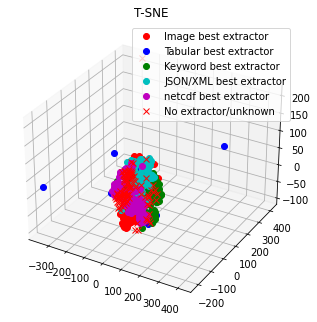

In [22]:
plot_extractors_against_feature_reduction_3d(all_file_data, twogram_tsne, "T-SNE")


In [23]:
def generate_label_data(all_file_data, Y):
	labels = np.zeros(Y.shape[0])
	for i in range(Y.shape[0]):
		if all_file_data[i].best_extractors == 'unknown':
			labels[i] = 5
		elif all_file_data[i].best_extractors == 'image':
			labels[i] = 0
		elif all_file_data[i].best_extractors == 'tabular':
			labels[i] = 1
		elif all_file_data[i].best_extractors == 'freetext':
			labels[i] = 2
		elif all_file_data[i].best_extractors == 'json/xml':
			labels[i] = 3
		elif all_file_data[i].best_extractors == 'netcdf':
			labels[i] = 4
	return labels
 


labels_true = generate_label_data(all_file_data, twogram_tsne)

In [35]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=20, min_samples=10).fit(twogram_tsne)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(labels)

[-1 -1 -1 -1  2 -1 -1  0  2 -1  0  1  2 -1  1  1 -1  2 -1 -1  0  1  2 -1
  0 -1 -1 -1 -1 -1  0  0  2 -1  2 -1 -1  2 -1  2  1  2  2 -1  0  0 -1  1
  2 -1  2  1 -1 -1 -1  0  2  0  2 -1  1 -1  2 -1  0 -1 -1  2  0 -1 -1 -1
  2 -1  2 -1  2  2 -1  0  1 -1  0  0  1 -1  1  2 -1 -1  2 -1  2 -1  2  2
 -1  2  2  0 -1 -1  3 -1 -1 -1 -1  3  5 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1  3  5 -1 -1 -1 -1  3 -1 -1 -1
 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 10 -1 -1 -1 -1  3 -1 -1 -1 -1  3 -1  3
 -1 -1 -1  5 -1 -1 -1  3 -1 -1 -1  3  3 -1 -1 -1  3 -1 -1 -1 -1  5 -1 -1
 -1 -1  5 -1 -1 -1 -1 -1 -1 -1  5 -1  5 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  4 -1 -1 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1  5  4  5  4  4  5 -1  4  5 -1
 -1 -1 -1 -1 -1 -1 10  5 -1 -1 -1 -1 -1 -1 -1  5 -1 -1  4 -1 -1 -1 -1 -1
  5 -1 -1 -1  5 -1 -1 -1 -1  3 -1 -1 10 -1  5  3  4 -1 -1 -1 -1  4 -1 -1
 -1  4 -1 -1 -1 -1  5 -1 -1  5 -1  5 -1  6 -1 -1 -1 -1 -1 -1 -1 -1  6 -1
 -1 -1 -1 -1 -1 -1  6 -1 -1 -1 -1 -1 -1 -1 -1  6  6

Estimated number of clusters: 12
Estimated number of noise points: 384
Homogeneity: 0.320
Completeness: 0.375
V-measure: 0.345
Adjusted Rand Index: 0.048
Adjusted Mutual Information: 0.323
Silhouette Coefficient: -0.085


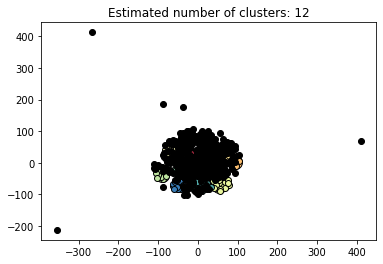

In [36]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(twogram_tsne, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = twogram_tsne[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = twogram_tsne[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

[[ -20.796007   -50.563305    -2.3123465]
 [   6.2054167   -2.3413684  -53.61473  ]
 [  -8.596607    49.57789     -2.033777 ]
 [  57.21321    -11.855112     2.532215 ]
 [ -10.145462    -4.529657    44.07464  ]
 [-110.0329    -656.5135    -139.3845   ]]
<ipython-input-108-4b37dc9d1d4a>:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


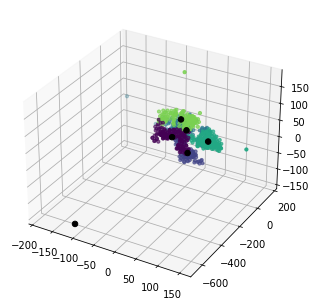

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

kmeans = KMeans(n_clusters=6)
data_pred = kmeans.fit_predict(twogram_tsne)
ax.scatter(twogram_tsne[:, 0], twogram_tsne[:,1], twogram_tsne[:,2], c=data_pred, s=10, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:,2], c='black', s=30, alpha=1)
print(centers)
plt.show()

In [ ]:
labels = kmeans.labels_
print(type(labels))
print(len(labels))

<class 'numpy.ndarray'>
600


In [ ]:

print(labels)
silhouette_score = metrics.silhouette_score(twogram_tsne, labels, metric='euclidean')

print("Silhouette score:", silhouette_score)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.

In [ ]:
silhouette_score = metrics.silhouette_score(twogram_tsne, kmeans.labels_, metric='euclidean')
print("Silhouette score:", silhouette_score)

Silhouette score: 0.35451326


In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9131924800767461
